# SNLP Assignment 2

Name 1: William LaCroix<br/>
Student id 1: 7038732<br/>
Email 1: williamplacroix@gmail.com<br/>


Name 2: Nicholas Jennings<br/>
Student id 2: 2573492<br/>
Email 2: s8nijenn@stud.uni-saarland.de<br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after your upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 - Theoretical Concepts (3 points)

In this exercise you will review and work on information theory concepts.

### 1.1 Joint and conditional entropy (2 points)

We define the joint entropy as:

$$ H(X,Y) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(x,y) $$

We define the conditional entropy as:

$$ 
\begin{align}
H(Y|X) & = \sum_{x \in \mathcal{X}} p(x,y) H(Y|X=x) \\
& = \sum_{x \in \mathcal{X}} p(x) \left[ - \sum_{y \in \mathcal{Y}}p(y|x) \log p(y|x) \right]
\end{align}
$$

Show that $H(X,Y) = H(X) + H(Y|X)$ or that $ H(Y|X) = H(X,Y) - H(X) $ holds.

Hint: this is analogous to $ P(y|x) = \frac{P(x,y)}{P(x)}$ in probability distributions.

### Answer:

$ H(X,Y) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(x,y) $</br>
$ H(X,Y) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(y|x)p(x) $ ### definition of conditional probability</br> 
$ H(X,Y) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(y|x) + \log p(x) $ ### splitting the log</br>
$ H(X,Y) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(y|x) - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(x) $ ### distribute the sum</br>
$ H(X,Y) = - \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x,y) \log p(y|x) - \sum_{x \in \mathcal{X}} p(x) \log p(x) $ ### marginalise over y</br>
$ H(X,Y) = - \sum_{x \in \mathcal{X}} p(x) \sum_{y \in \mathcal{Y}} p(y|x) \log p(y|x) - \sum_{x \in \mathcal{X}} p(x) \log p(x) $ ### definition of joing probability</br>
$ H(X,Y) = H(Y|X) - \sum_{x \in \mathcal{X}} p(x) \log p(x) $ ### definition of entropy</br>
$ H(X,Y) = H(Y|X) + H(X)$ ### definition of conditional entropy</br>

### 1.2 Counts as best estimation of probability (1 point)

Let's go back to n-grams.

Consider the formula: 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we need to define $P$. The estimate for the parameters of the MLE (we will revisit this problem once the lectures have covered MLE) is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of $N$ words and a vocabulary of size $n$. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. Please clarify any notation that you may use in the formulas.

As a hint, we provide you with the probability of unigrams:

$$ P(w_i) = \frac{c(w_i)}{\sum_{j=1}^n c(w_j)} $$

Where $c(w_i)$ is the count of ocurrences of $w_i$.

Again, you should provide the conditional probabilities for bigrams and trigrams.

### Answer:

Bigram probability: $\to P(w_i|w_{i-1}) = \frac{c(w_{i-1},w_i)}{\sum_{j=1}^n c(w_{i-1},w_j)} $

Trigram probability: $\to P(w_i|w_{i-2},w_{i-1}) = \frac{c(w_{i-2},w_{i-1},w_i)}{\sum_{j=1}^n c(w_{i-2},w_{i-1},w_j)} $

## Exercise 2 - Comparing distributions (5 points)

In this exercise you will compare the probability distributions $P(w_i|w_{i−1} = ``to")$ and $P(w_i|w_{i−1} = ``the")$ . The distribution of the words given the previous word is "to" or "the" respectively.

1. Download the Brown corpus from the web (http://www.nltk.org/nltk_data/) or through the python NLTK toolkit. (0.5 points)
1. Tokenize and lowercase each token. (0.5 points)
1. Estimate the conditional probability distributions $P(w_i|w_{i−1} = ``to")$ and $P(w_i|w_{i−1} = ``the")$
with maximum likelihood estimation. (2 point)
1. Plot the frequency distribution (unnormalized frequency counts) or the probability distribution for the 50 most frequent tokens for both distributions. Based on the plots which distribution do you expect to have a higher entropy? Justify your answer. (1 points)
1. Calculate the entropy for both distributions. Was your guess accurate? Elaborate on why it was right/wrong. (1 point)


Some remarks:

* Though not crucial, remember to use a base 2 logarithm, i.e. $\log_2$.
* Your code should be fast enough to tokenize and get the bigram statistics for the Brown corpus in a few seconds.
* A bar plot would be ideal to visualize the probabilities/counts for the top 50 words.
* If you need to modify the boilerplate code below, comment why. **You are allowed to change the provided code, both in the notebook and in the python file, but please explain why you did.**.

In [42]:
from importlib import reload
import exercise_2_and_3
exercise_2_and_3 = reload(exercise_2_and_3)

tokenized_corpus = exercise_2_and_3.load_corpus()
top_50 = exercise_2_and_3.get_top_n_probabilities(tokenized_corpus, ['the', 'to'], 50)

# Feel free to make the printing of the result "prettier"
for context in top_50:
    print(f"Top 50 most frequent bigrams with the context of '{context}':")
    for i, (bigram, count) in enumerate(top_50[context]):
        print(f"{i+1}: {bigram} - frequency: {count}")
    print("\n")

Top 50 most frequent bigrams with the context of 'the':
1: ('the', 'first') - frequency: 0.009461062440153777
2: ('the', 'same') - frequency: 0.008975146846550713
3: ('the', 'most') - frequency: 0.005959611839190522
4: ('the', 'other') - frequency: 0.005945320204084549
5: ('the', '``') - frequency: 0.005788112217918852
6: ('the', 'new') - frequency: 0.005673779137071073
7: ('the', 'united') - frequency: 0.005616612596647182
8: ('the', 'world') - frequency: 0.005159280273256063
9: ('the', 'state') - frequency: 0.0038730331137185403
10: ('the', 'two') - frequency: 0.0038301582084006233
11: ('the', 'only') - frequency: 0.0036872418573408983
12: ('the', 'time') - frequency: 0.003587200411599091
13: ('the', 'way') - frequency: 0.0034157007903274214
14: ('the', 'old') - frequency: 0.003344242614797559
15: ('the', 'last') - frequency: 0.003187034628631862
16: ('the', 'house') - frequency: 0.0030869931828900543
17: ('the', 'next') - frequency: 0.0030012433722542194
18: ('the', 'end') - frequen

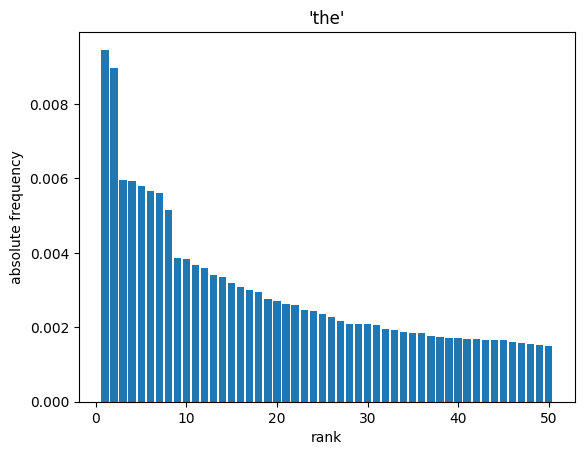

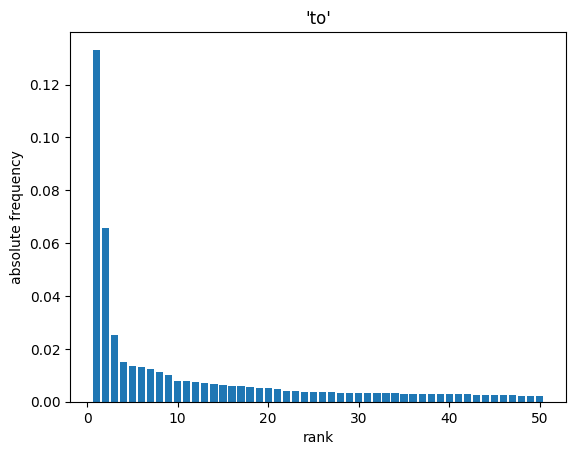

In [43]:
# Plot frequencies or distributions of the top 50 following words
exercise_2_and_3 = reload(exercise_2_and_3) # refresh without running previous cell
exercise_2_and_3.plot_top_n(top_50)

### Answer 2.4:
We would expect 'the' to have higher entropy, since entropy is maximized when the frequency distribuition for all of the elements are identical to the mean frequency. The top 50 elements in the 'the' plot look a lot more "flat", and perfectly flat box plot would have equal frequency distributions (max entropy), and since 'the' seems to have a more even distribution, it would then have higher entropy.

In [1]:
# Calculate the entropy
exercise_2_and_3 = reload(exercise_2_and_3) # refresh without running previous cell
print(exercise_2_and_3.get_entropy(top_50))

NameError: name 'reload' is not defined

## Exercise 3 - Mean rank (1 point)

With the distributions from exercise 2, calculate the perplexity and mean rank of the following phrases:

* "the election"
* "the jury"
* "the administration"
* "the to"
* "the the"

How close are the two metrics? Which one would you use?

Note: Assume that bi-grams not present have a $P$ of $0^+$, and therefore a logarithm value of $-\infty$.

In [116]:
# You will probably need to pass more arguments aside from just the bigram
# to be evaluated to each of these calls.
exercise_2_and_3 = reload(exercise_2_and_3) # refresh without running previous cell

# Get perplexity scores
# exercise_2_and_3.get_perplexity("the election")
# exercise_2_and_3.get_perplexity("the jury")
# exercise_2_and_3.get_perplexity("the administration")
# exercise_2_and_3.get_perplexity("the to")
# exercise_2_and_3.get_perplexity("the the")

# Get mean rank scores
exercise_2_and_3.get_mean_rank(["the election","the jury","the administration","the to","the the"], tokenized_corpus) # condensed into single function call

the
Mean rank: 363.0
